# Usage

Pymech is a simple interface to read / to write Nek5000 and SIMSON specific
data files to / from the Python world. With this capability you could:

- make publication-quality figures
- post-process
- manipulate meshes
- generate initial conditions
- interpolate or extrapolate solution fields, and

possibly many more potential use-cases  -- the limit is your imagination! Here
we look at some simple operations you can do. Start by [installing
pymech](index.rst) and:

In [1]:
!git clone --recursive https://github.com/eX-Mech/pymech.git
%cd pymech/tests/data/nek

Cloning into 'pymech'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 1322 (delta 187), reused 253 (delta 132), pack-reused 1001
Receiving objects: 100% (1322/1322), 12.38 MiB | 8.30 MiB/s, done.
Resolving deltas: 100% (806/806), done.
/home/avmo/src/snek5000/pymech/docs/pymech/tests/data/nek


## {class}`pymech.neksuite`

In [2]:
from pymech.neksuite import readnek

field = readnek('channel3D_0.f00001')

Simply typing the read `field` would give you some basic information:

In [3]:
field

<pymech.core.HexaData>
Dimensions:    3
Precision:     4 bytes
Mesh limits:
  * x:         [0.         6.28318548]
  * y:         [-1.  1.]
  * z:         [0.         3.14159274]
Time:
  * time:      0.2
  * istep:     10
Elements:
  * nel:       512
  * elem:      [<elem centered at [ 0.39269908 -0.98        0.19634954]>
                ...
                <elem centered at [5.89048618 0.98       2.94524309]>]

### {class}`pymech.core.HexaData`

The {class}`pymech.core.HexaData` class is the in-memory data structure widely used in Pymech. It stores a description of the field and other metadata. Let's look at the available attributes:

In [4]:
[attr for attr in dir(field) if not attr.startswith('__')]

['check_connectivity',
 'elem',
 'elmap',
 'endian',
 'istep',
 'lims',
 'lr1',
 'merge',
 'nbc',
 'ncurv',
 'ndim',
 'nel',
 'time',
 'var',
 'wdsz']

Here `check_connectivity` and `merge` are methods, and `elem` and `elmap` are data objects. The rest of the attributes store metadata. See {ref}`core` to understand what they imply.

In [5]:
print(field.endian, field.istep, field.lr1, field.nbc, field.ncurv, field.ndim, field.nel, field.time, field.var, field.wdsz)

little 10 [8, 8, 8] 0 [] 3 512 0.2 [3, 3, 1, 0, 0] 4


The `elem` attribute contains data of physical fields. It is an array of lists, with each array representing an element.

In [6]:
print("There are", field.nel, "elements in this file")

There are 512 elements in this file


### {class}`pymech.core.Elem`

The raw arrays are stored as a list of {class}`pymech.core.Elem` instances as {class}`pymech.core.HexaData`'s `elem` attribute.

In [7]:
first_element = field.elem[0]
print("Type =", type(first_element))
print(first_element)

Type = <class 'pymech.core.Elem'>
<elem centered at [ 0.39269908 -0.98        0.19634954]>


Let us look at the attributes of an element

In [8]:
[attr for attr in dir(first_element) if not attr.startswith('__')]

['bcs',
 'ccurv',
 'centroid',
 'curv',
 'face_center',
 'pos',
 'pres',
 'scal',
 'temp',
 'vel']

Except for the following attributes of an element object

In [9]:
print(first_element.bcs, first_element.ccurv, first_element.curv)

[] ['', '', '', '', '', '', '', '', '', '', '', ''] [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


it contains large arrays 

In [10]:
print("Shape of element velocity and pressure arrays = ", first_element.vel.shape, first_element.pres.shape)

Shape of element velocity and pressure arrays =  (3, 8, 8, 8) (1, 8, 8, 8)


## {mod}`pymech.dataset`

In [11]:
from pymech.dataset import open_dataset

ds = open_dataset('channel3D_0.f00001')

This function loads the field file in a more convenient [xarray](https://xarray.pydata.org) dataset.

In [12]:
ds

<xarray.Dataset>
Dimensions:   (x: 64, y: 64, z: 64)
Coordinates:
  * y         (y) float64 -1.0 -0.9974 -0.9918 -0.9842 ... 0.9918 0.9974 1.0
  * x         (x) float64 0.0 0.05037 0.1603 0.3105 ... 5.973 6.123 6.233 6.283
  * z         (z) float64 0.0 0.02518 0.08017 0.1553 ... 2.986 3.061 3.116 3.142
    time      float64 0.2
Data variables:
    xmesh     (z, y, x) float64 0.0 0.05037 0.1603 0.3105 ... 6.123 6.233 6.283
    ymesh     (z, y, x) float64 -1.0 -1.0 -1.0 -1.0 -1.0 ... 1.0 1.0 1.0 1.0 1.0
    zmesh     (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 3.142 3.142 3.142 3.142
    ux        (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uy        (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uz        (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    pressure  (z, y, x) float64 0.004913 0.0467 0.0195 ... 0.03768 0.0761

The dataset is more descriptive and useful for exploratory work, such as post-processing and plotting.

### Computing statistics

Calculate median for all variables

In [13]:
ds.median()

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    time      float64 0.2
Data variables:
    xmesh     float64 3.142
    ymesh     float64 0.0
    zmesh     float64 1.571
    ux        float64 0.8375
    uy        float64 0.0
    uz        float64 0.0
    pressure  float64 0.0001238

### Slicing

Slice by index:

In [14]:
ds.ux.isel(z=32)

<xarray.DataArray 'ux' (y: 64, x: 64)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.006773  , 0.01130644, 0.01251847, ..., 0.01209086, 0.01235788,
        0.006773  ],
       [0.02467888, 0.03595118, 0.03948131, ..., 0.03794473, 0.03727177,
        0.02467888],
       ...,
       [0.03804531, 0.0281054 , 0.03863081, ..., 0.03893135, 0.04252424,
        0.03804531],
       [0.01240053, 0.00786791, 0.01261182, ..., 0.01296887, 0.01406241,
        0.01240053],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * y        (y) float64 -1.0 -0.9974 -0.9918 -0.9842 ... 0.9918 0.9974 1.0
  * x        (x) float64 0.0 0.05037 0.1603 0.3105 ... 5.973 6.123 6.233 6.283
    z        float64 1.571
    time     float64 0.2

It is also possible to slice by value using `sel` method

### Visualizing

Average in spanwise (`z`) direction and plot velocity profile

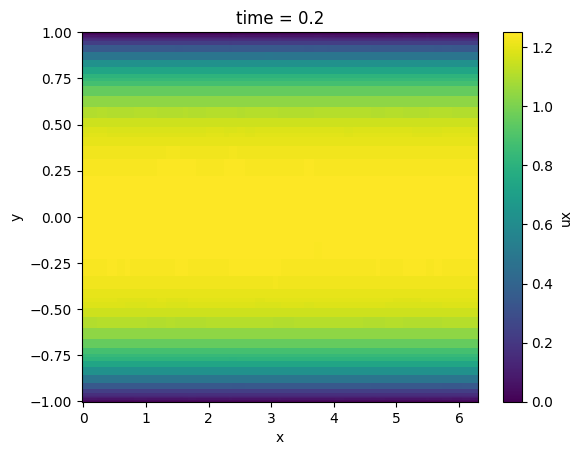

In [15]:
ds.ux.mean('z').plot()

Average in both horizontal direction and plot 1D profile

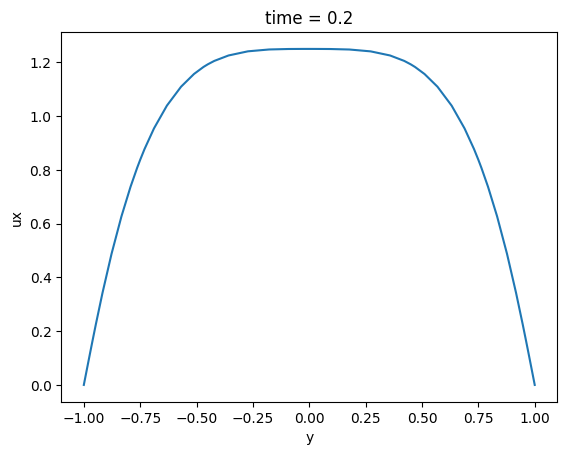

In [16]:
ds_1d = ds.mean(['x', 'z'])
ds_1d.ux.plot()

It is also worth knowing that it is possible to:

- Parallelize these operations using `ds.chunk` method followed by `ds.compute`
- Open a multiple files into a single dataset using {any}`pymech.dataset.open_mfdataset`, optionally in parallel.

Read the [xarray documentation](https://xarray.pydata.org/en/stable/quick-overview.html) to see how to use them.